In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('../data/train.csv')

In [3]:
def add_datetime(df):
    if 'datetime' not in df.columns:
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
    df.set_index('datetime', inplace=True)
    return df

In [4]:
df = add_datetime(data)

In [5]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
datetime,,,,,,,,,,,
2018-05-04 22:01:00,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
2018-05-04 22:02:00,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2018-05-04 22:03:00,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
2018-05-04 22:04:00,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
2018-05-04 22:05:00,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


In [6]:
df[['open', 'close']].head()

,open,close
datetime,,
2018-05-04 22:01:00,0.90120,0.90130
2018-05-04 22:02:00,0.90185,0.90195
2018-05-04 22:03:00,0.90140,0.90139
2018-05-04 22:04:00,0.90139,0.90139
2018-05-04 22:05:00,0.90139,0.90130


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2122438 entries, 2018-05-04 22:01:00 to 2022-05-17 19:58:00
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
dtypes: float64(10), int64(1)
memory usage: 194.3 MB


In [8]:
df.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01
std,3.676171e+07,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01
min,1.525471e+09,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.557308e+09,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00
50%,1.589144e+09,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00
75%,1.620981e+09,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00
max,1.652817e+09,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00


In [9]:
df.isnull().sum()

timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
target                    0
dtype: int64

Time-series plotting

In [10]:
def time_series_vis(feature: str, start_time = None, end_time = None, window = None):
    if start_time and end_time:
        df_filtered = df.loc[start_time : end_time].copy()
    elif start_time:
        df_filtered = df.loc[start_time :].copy()
    elif end_time:
        df_filtered = df.loc[: end_time].copy()
    else:
        df_filtered = df.copy()

    plt.figure(figsize = (14,7))
    plt.plot(df_filtered.index, df_filtered[feature], label = feature, color = 'blue')

    if window:
        df_filtered[f'{feature}_moving_average'] = df_filtered[feature].rolling(window = window).mean()
        df_filtered[f'{feature}_e_moving_average'] = df_filtered[feature].ewm(span = window, adjust = False).mean()
    
        plt.plot(df_filtered.index, df_filtered[f'{feature}_moving_average'], label = f'{feature} moving average over window size: {window}', color = 'orange', alpha = 0.4)
        plt.plot(df_filtered.index, df_filtered[f'{feature}_e_moving_average'], label = f'{feature} exponential moving average over window size: {window}', color = 'red', alpha = 0.4)
    plt.title(f'{feature} over time')
    plt.legend()
    plt.show()

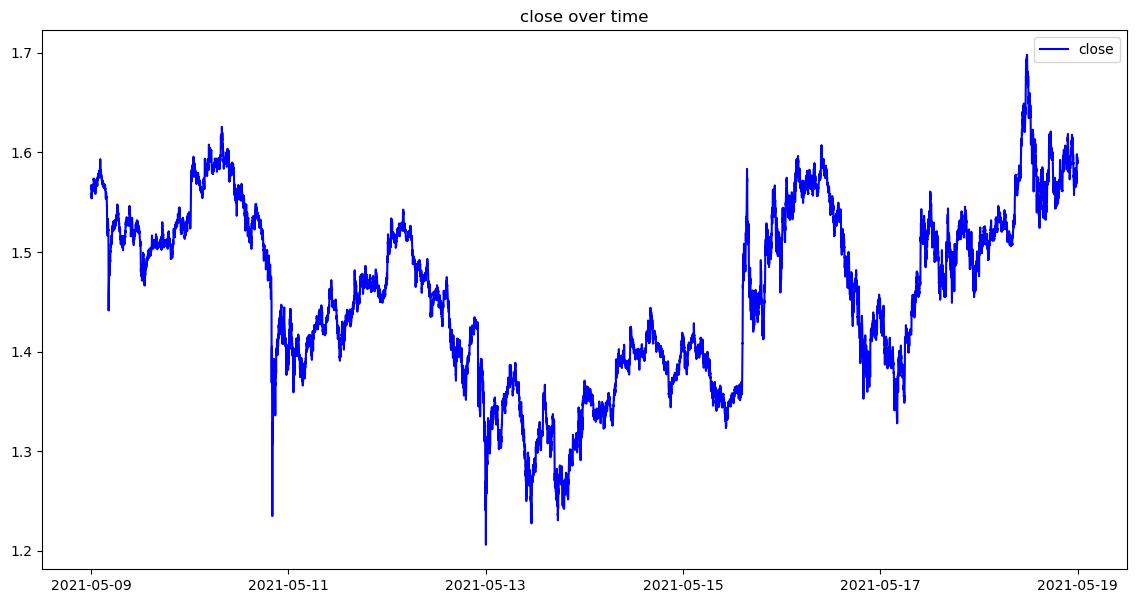

In [11]:
time_series_vis(feature = 'close', start_time = '2021-05-09 00:00:00', end_time = '2021-05-19 00:00:00', window = None)

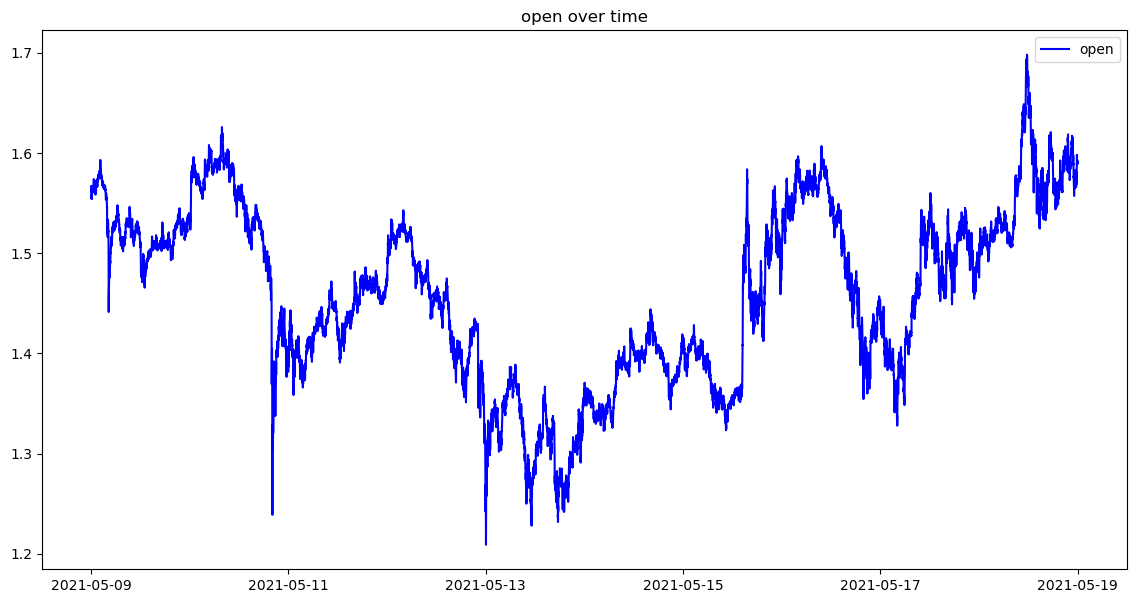

In [12]:
time_series_vis(feature = 'open', start_time = '2021-05-09 00:00:00', end_time = '2021-05-19 00:00:00', window = None)

In [13]:
def open_close_target_vis(start_time = None, end_time = None):
    if start_time:
        start_time = pd.to_datetime(start_time)
    if end_time:
        end_time = pd.to_datetime(end_time)

    if start_time and end_time:
        df_filtered = df.loc[start_time:end_time].copy()
    elif start_time:
        df_filtered = df.loc[start_time:].copy()
    elif end_time:
        df_filtered = df.loc[:end_time].copy()
    else:
        df_filtered = df.copy()

    plt.figure(figsize=(14, 7))
    plt.plot(df_filtered.index, df_filtered['open'], label='open price', color='blue', linestyle='--')
    plt.plot(df_filtered.index, df_filtered['close'], label='close price', color='green')


    colors = ['red' if t == 1 else 'black' for t in df_filtered['target']]
    plt.scatter(df_filtered.index, df_filtered['close'], c=colors, label='target (red = positive)', marker='o', s=50)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.5f'))

    plt.title('open-close prices with target')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()
    plt.grid(True)
    plt.show()

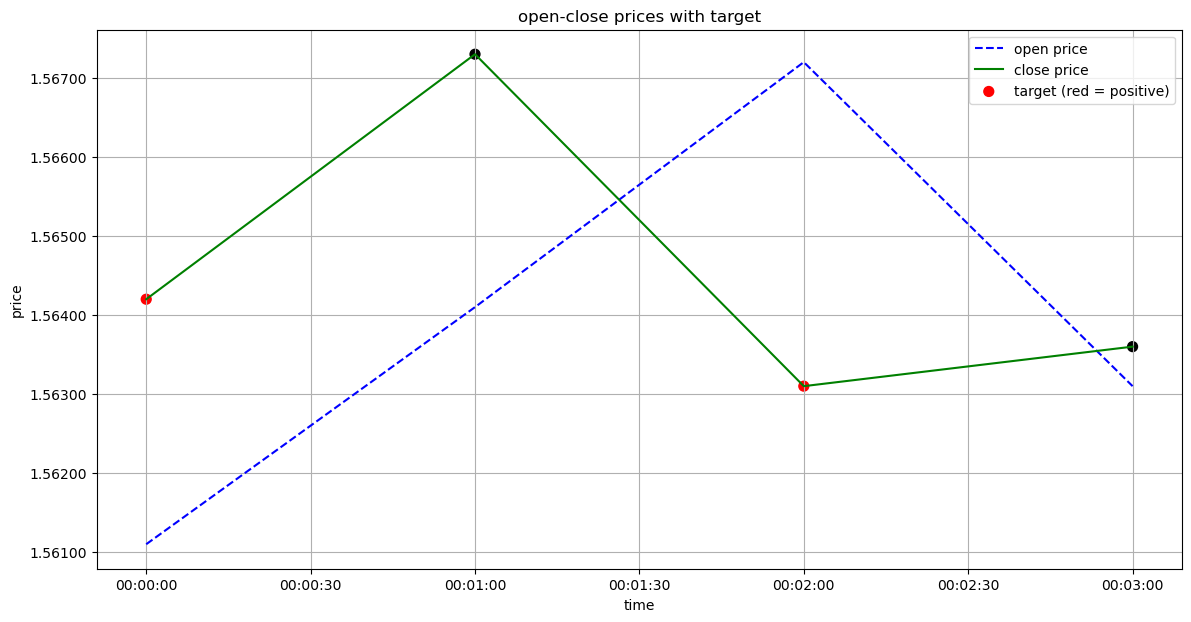

In [14]:
open_close_target_vis(start_time = '2021-05-09 00:00:00', end_time = '2021-05-09 00:03:00')

In [15]:
def open_close_summary(start_time=None, end_time=None):
    if start_time and end_time:
        df_filtered = df.loc[start_time:end_time].copy()
    else:
        df_filtered = df.copy()
    df_filtered['price_diff'] = df_filtered['close'] - df_filtered['open']
    
    summary = df_filtered[['open', 'close', 'price_diff', 'target']].head(20)
    return summary.style.map(lambda x: 'background-color: lightgreen' if x > 0 else 'background-color: lightcoral', subset=['price_diff'])

In [16]:
open_close_summary('2018-05-05 01:00:00', '2018-05-05 01:19:00')

,open,close,price_diff,target
datetime,,,,
2018-05-05 01:00:00,0.896430,0.895200,-0.001230,0.000000
2018-05-05 01:01:00,0.895200,0.893910,-0.001290,1.000000
2018-05-05 01:02:00,0.895200,0.896500,0.001300,0.000000
2018-05-05 01:03:00,0.898110,0.896500,-0.001610,0.000000
2018-05-05 01:04:00,0.896500,0.892520,-0.003980,0.000000
2018-05-05 01:05:00,0.893000,0.892180,-0.000820,1.000000
2018-05-05 01:06:00,0.895950,0.895390,-0.000560,0.000000
2018-05-05 01:07:00,0.895390,0.894900,-0.000490,0.000000
2018-05-05 01:08:00,0.894900,0.892600,-0.002300,1.000000


In [17]:
def target_distribution(df):
    target_counts = df['target'].value_counts(normalize=True)
    target_counts.plot(kind='bar', title='target distribution (0 - negative, 1 - positive)', color=['red', 'blue'])
    plt.xlabel('target')
    plt.ylabel('proportion')
    plt.show()

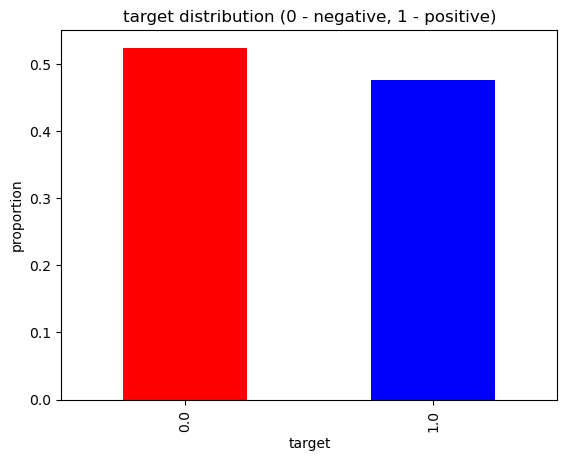

In [18]:
target_distribution(df)

In [19]:
def price_distribution(df):
    plt.figure(figsize=(14, 8))

    ax1 = plt.subplot(2, 2, 1)
    sns.boxplot(x='target', y='open', data=df)
    ax1.set_title('open price by target')
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    ax2 = plt.subplot(2, 2, 2)
    sns.boxplot(x='target', y='close', data=df)
    ax2.set_title('close price by target')
    ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    ax3 = plt.subplot(2, 2, 3)
    sns.boxplot(x='target', y='high', data=df)
    ax3.set_title('high price by target')
    ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    ax4 = plt.subplot(2, 2, 4)
    sns.boxplot(x='target', y='low', data=df)
    ax4.set_title('low price by target')
    ax4.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    plt.tight_layout()
    plt.show()

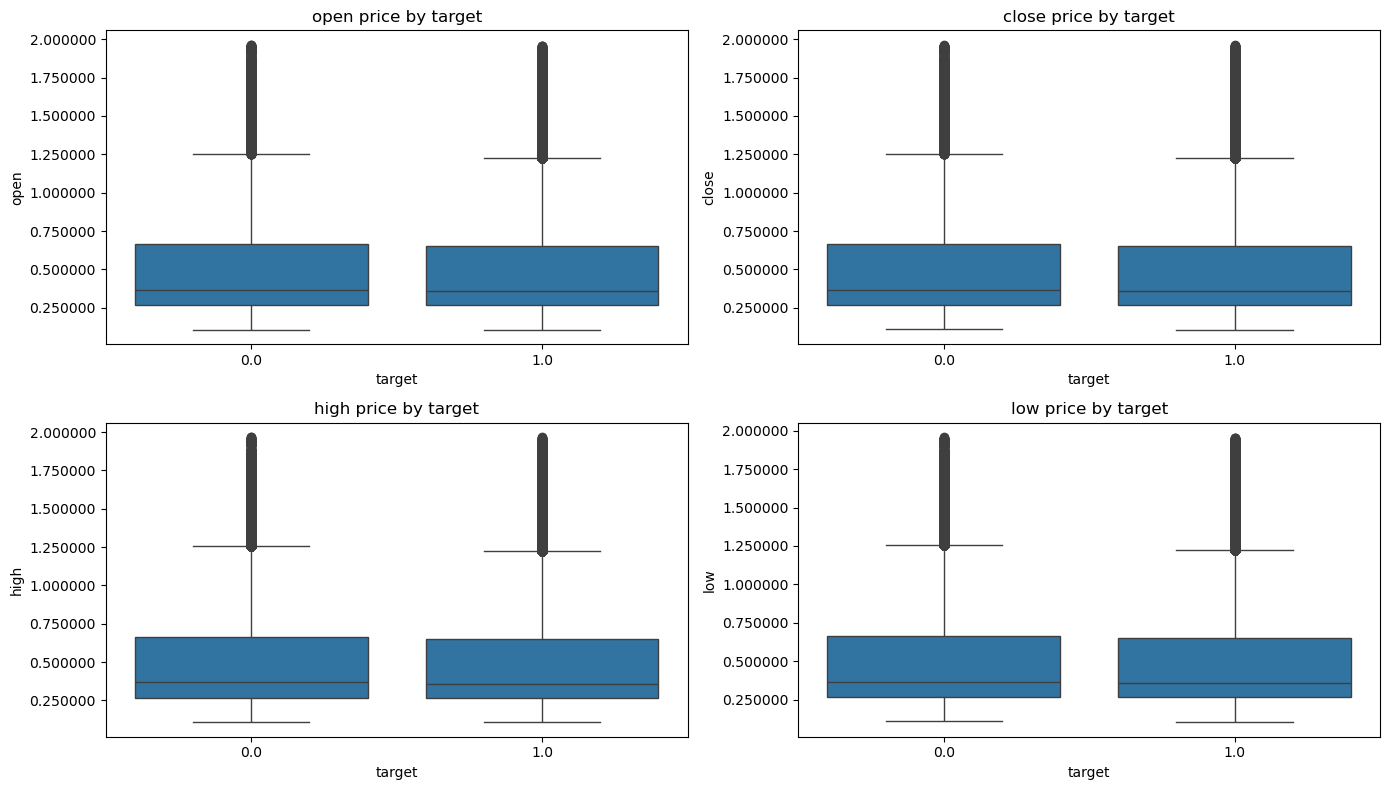

In [20]:
price_distribution(df)

In [21]:
def price_range_analysis(df):
    df['high_low_range'] = df['high'] - df['low']
    df['close_open_range'] = df['close'] - df['open']
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='target', y='high_low_range', data=df)
    plt.title('high low, target')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='target', y='close_open_range', data=df)
    plt.title('close open, target')
    
    plt.tight_layout()
    plt.show()

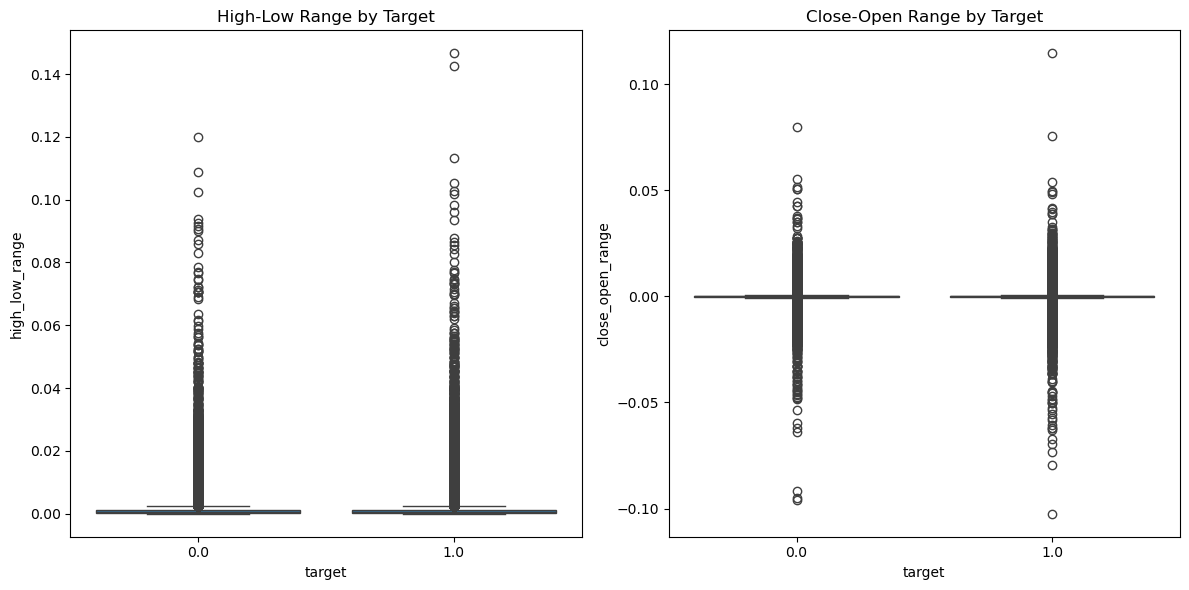

In [22]:
price_range_analysis(df)

In [23]:
def summ(df):
    return df.groupby('target')[['high_low_range', 'close_open_range']].describe()

In [24]:
summ(df)

high_low_range                                                      \
                count      mean       std  min      25%      50%      75%   
target                                                                      
0.0         1112614.0  0.000985  0.001659  0.0  0.00021  0.00049  0.00110   
1.0         1009824.0  0.001036  0.001840  0.0  0.00022  0.00050  0.00113   

                close_open_range                                            \
            max            count      mean       std     min      25%  50%   
target                                                                       
0.0     0.12000        1112614.0  0.000020  0.001172 -0.0959 -0.00019  0.0   
1.0     0.14659        1009824.0 -0.000024  0.001287 -0.1024 -0.00023  0.0   

                         
            75%     max  
target                   
0.0     0.00021  0.0799  
1.0     0.00019  0.1145

In [25]:
def correlation_with_target(df):
    price_features = ['open', 'close', 'high', 'low', 'high_low_range', 'close_open_range']
    correlations = df[price_features + ['target']].corr()
    
    return correlations['target'].sort_values(ascending=False)

In [26]:
correlation_with_target(df)

target              1.000000
high_low_range      0.014372
high               -0.003995
open               -0.004030
low                -0.004087
close              -0.004100
close_open_range   -0.018042
Name: target, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2122438 entries, 2018-05-04 22:01:00 to 2022-05-17 19:58:00
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
 11  high_low_range          float64
 12  close_open_range        float64
dtypes: float64(12), int64(1)
memory usage: 226.7 MB


In [28]:
def volume_distribution(df):
    plt.figure(figsize=(14, 8))

    ax1 = plt.subplot(2, 2, 1)
    sns.boxplot(x='target', y='quote_asset_volume', data=df)
    ax1.set_title('quote asset volume by target')
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    ax2 = plt.subplot(2, 2, 2)
    sns.boxplot(x='target', y='number_of_trades', data=df)
    ax2.set_title('number of trades by target')
    ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    ax3 = plt.subplot(2, 2, 3)
    sns.boxplot(x='target', y='taker_buy_base_volume', data=df)
    ax3.set_title('taker buy base volume by target')
    ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    ax4 = plt.subplot(2, 2, 4)
    sns.boxplot(x='target', y='taker_buy_quote_volume', data=df)
    ax4.set_title('taker buy quote volume by target')
    ax4.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    
    plt.tight_layout()
    plt.show()

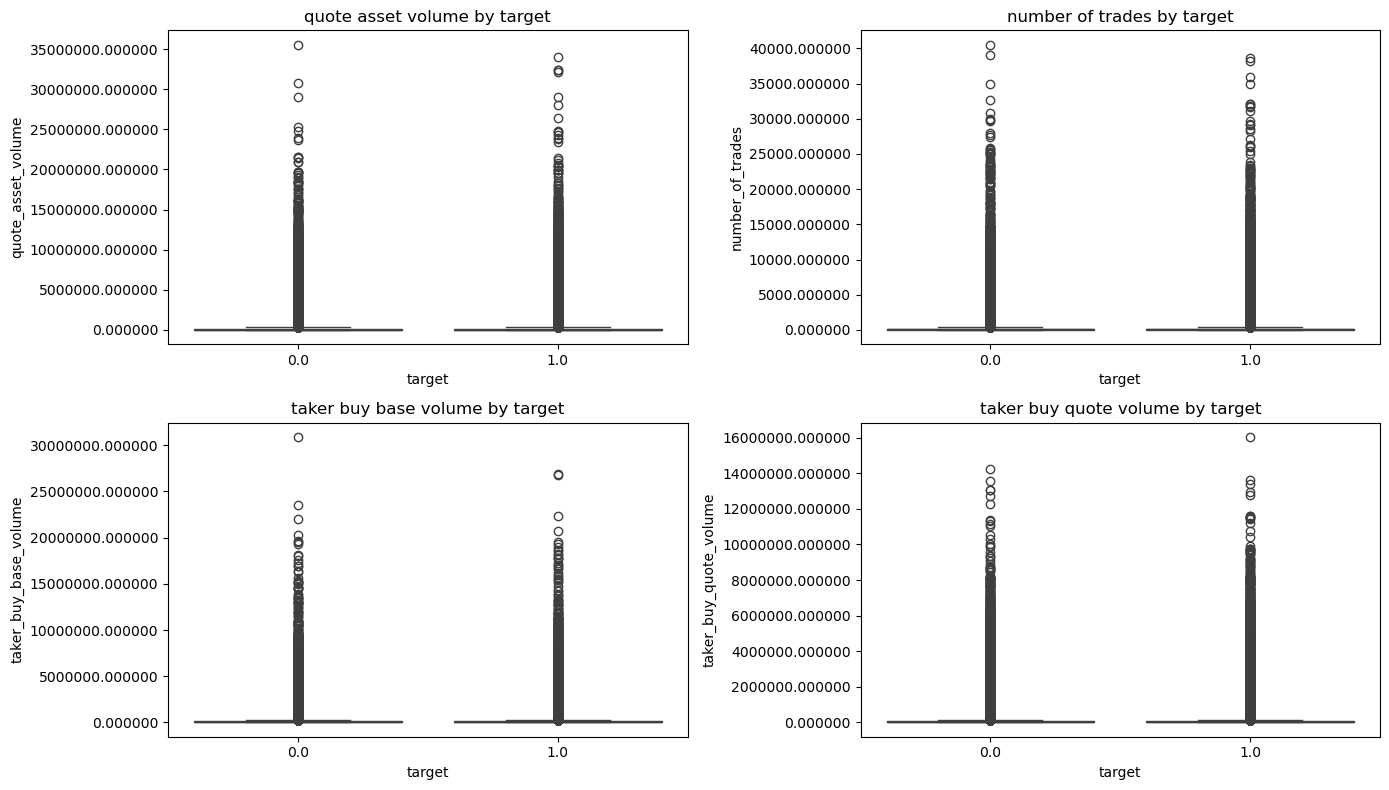

In [29]:
volume_distribution(df)

In [30]:
def heatmap(df, features):
    plt.figure(figsize = (12, 8))

    corr_matrix = df[features].corr()

    sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
    plt.title(f"correlation matrix of {' '.join(features)} features")
    plt.show()

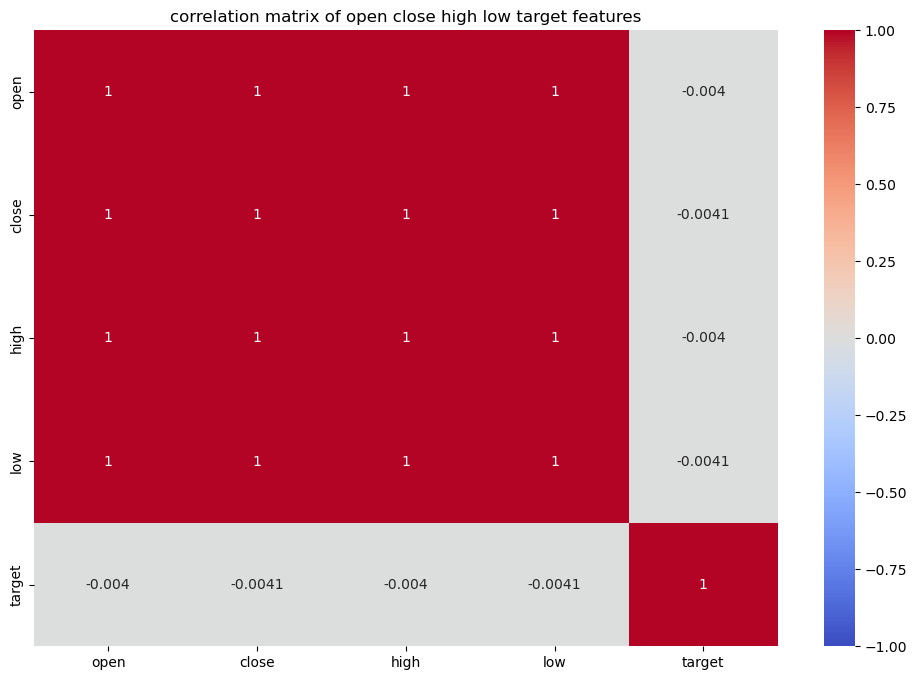

In [31]:
heatmap(df, ['open', 'close', 'high', 'low', 'target'])

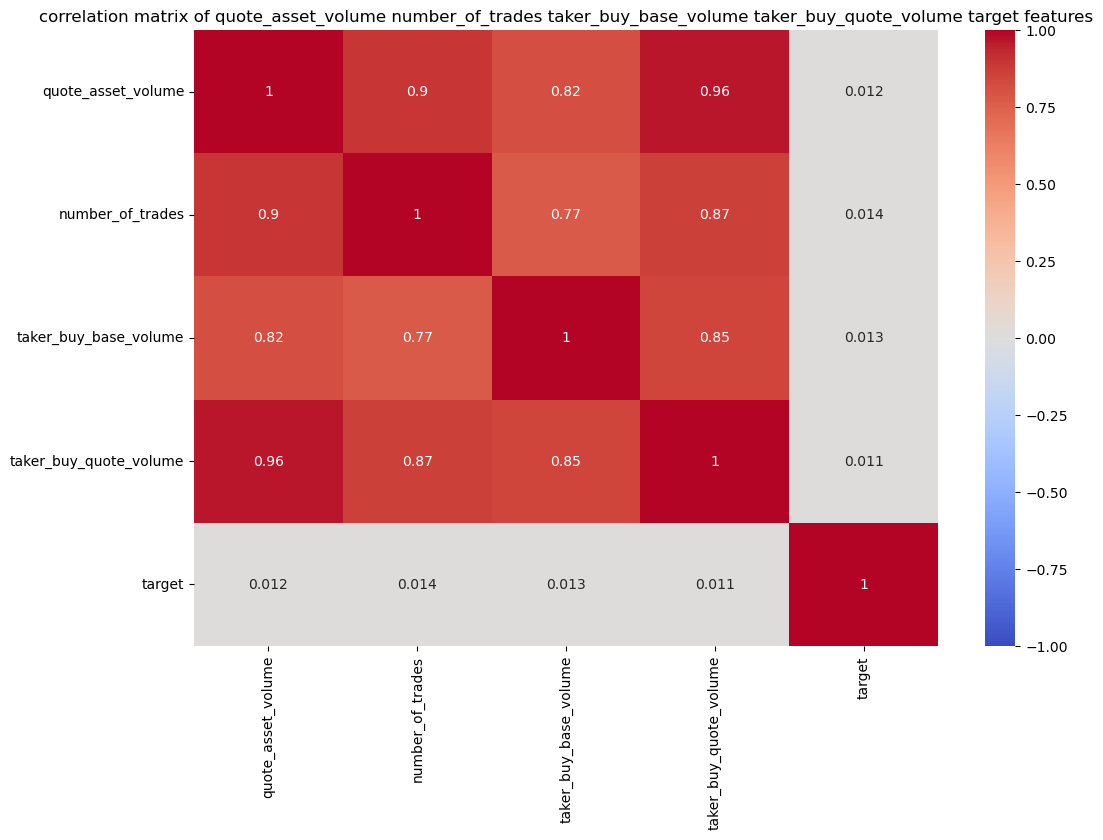

In [32]:
heatmap(df, ['quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume', 'target'])

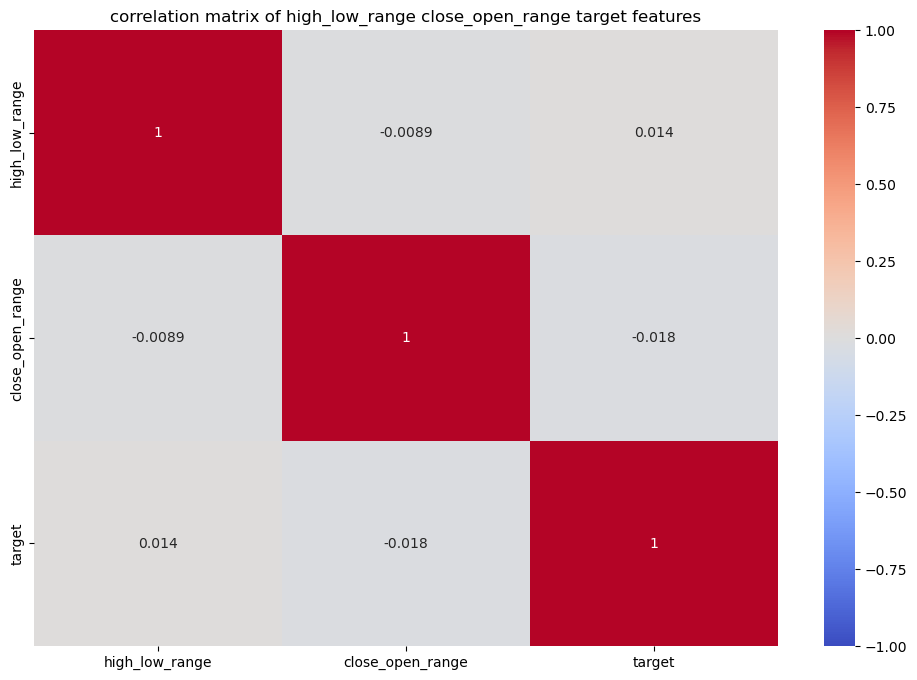

In [33]:
heatmap(df, ['high_low_range', 'close_open_range', 'target'])

In [34]:
m_df = df.copy()

In [35]:
m_df['taker_buy_combined'] = m_df['taker_buy_base_volume'] + m_df['taker_buy_quote_volume']
m_df['close_open_trades'] = m_df['close_open_range'] * m_df['number_of_trades']
m_df['volume_price_interaction'] = m_df['quote_asset_volume'] * m_df['close_open_range']

m_df['lagged_close_open'] = m_df['close_open_range'].shift(1)
m_df['lagged_volume'] = m_df['quote_asset_volume'].shift(1)

In [36]:
test_cols = ['taker_buy_combined', 'close_open_trades', 'volume_price_interaction', 'lagged_close_open', 'lagged_volume']
test_y = df.target

In [37]:
data_dt = DecisionTreeRegressor().fit(m_df[test_cols], test_y)

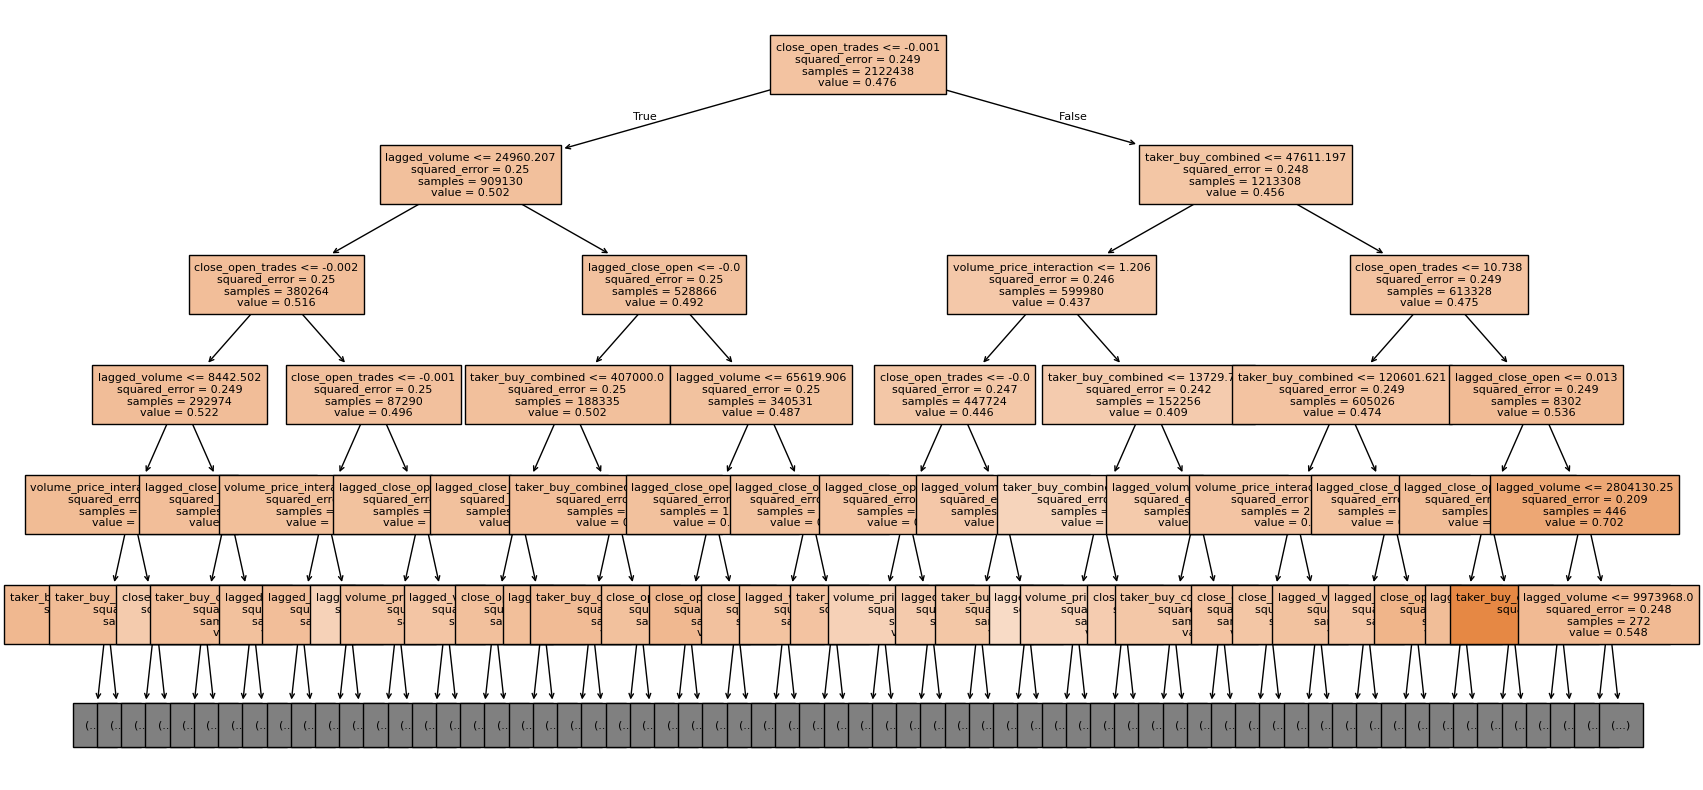

In [38]:
plt.figure(figsize = (20, 10))
plot_tree(data_dt, filled = True, feature_names = test_cols, max_depth = 5, fontsize = 8)
plt.show()

# taker buy combined: total USD spent + total crypto bought
# close open trades: price movement * number of trades
# volume price interaction: value total of trades * range
# lagged close open: shifts the close-open range by 1, better for forecasting
# lagged volume: shifts the volume by 1

In [39]:
print(m_df.corr())

                          timestamp      open      high       low     close  \
timestamp                  1.000000  0.534376  0.534272  0.534501  0.534386   
open                       0.534376  1.000000  0.999994  0.999994  0.999992   
high                       0.534272  0.999994  1.000000  0.999989  0.999995   
low                        0.534501  0.999994  0.999989  1.000000  0.999995   
close                      0.534386  0.999992  0.999995  0.999995  1.000000   
volume                     0.237101  0.205516  0.206893  0.203911  0.205389   
quote_asset_volume         0.272706  0.427065  0.428565  0.425314  0.426929   
number_of_trades           0.286741  0.390715  0.392173  0.389095  0.390649   
taker_buy_base_volume      0.231311  0.203129  0.204721  0.201869  0.203450   
taker_buy_quote_volume     0.265828  0.419227  0.420968  0.417871  0.419604   
target                     0.005468 -0.004030 -0.003995 -0.004087 -0.004100   
high_low_range             0.241127  0.528457  0.530